### Importing necessary libraries

In [1]:
import re
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# reading dataset
dataset = pd.read_csv('training_data_.csv')

In [3]:
# normalization of columns as it contains white spaces
dataset.columns =  dataset.columns.str.replace('[^a-zA-Z0-9_]+', '')
dataset.drop('url_id', axis = 1, inplace=True)

In [4]:
dataset.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,0,1,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1,0,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,7,0,0,0,0,1,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1,0,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
4,731,10,370,0.559889,1.0,0.698198,2,2,0,0,4.359459,9,0,0,0,0,1,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,8500.0,8500.0,8500.000000,1,0,0,0,0,0,0,0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855


    we'll first narrow down the number of features with 2 criteria:

    1. check null values
    2. positive correlation with our target, shares

In [5]:
dataset.isnull().sum().any()

False

In [6]:
dataset.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.245930,-0.058101,0.000665,-0.001635,0.001355,0.001344,0.066818,-0.023885,0.003140,0.126526,0.048569,0.050990,-0.049645,0.052553,0.071842,0.083798,-0.169172,0.589720,0.033261,0.135106,-0.073914,-0.637095,-0.491516,-0.157025,-0.050229,-0.160617,-0.013129,-0.016897,-0.016638,-0.007831,-0.005796,0.011607,0.002016,-0.002486,-0.005903,0.008543,0.002155,0.074875,0.004906,-0.136326,-0.026601,0.088315,0.133356,0.154188,0.201508,0.011688,0.191098,-0.068497,0.125016,0.055301,0.094099,-0.001152,0.058704,-0.057671,-0.016162,0.042084,0.015007,-0.004289,0.008875
n_tokens_title,-0.245930,1.000000,0.015023,-0.005456,-0.005087,-0.005540,-0.051277,-0.013741,-0.009498,0.050779,-0.072619,-0.008840,-0.070620,0.126953,-0.024701,-0.085531,-0.046179,0.052107,-0.110908,-0.008705,-0.033366,0.013320,0.124597,0.119613,-0.000860,0.002566,0.001143,-0.004710,-0.003569,-0.002327,0.008698,0.006103,0.007875,-0.016440,-0.003430,-0.016715,0.011515,-0.003379,-0.067096,0.061341,0.039560,0.040439,-0.065184,-0.054613,-0.073818,-0.067734,0.017986,-0.068812,0.038533,-0.046968,-0.018251,-0.022279,-0.019006,-0.029718,0.009985,0.078186,0.001909,-0.145952,0.042120,0.013472
n_tokens_content,-0.058101,0.015023,1.000000,-0.000566,0.018415,0.003758,0.431153,0.308970,0.337982,0.113072,0.167325,0.068304,0.034604,0.060443,-0.007236,0.038673,0.026859,0.054569,-0.051577,0.002265,0.000125,-0.017980,0.054191,-0.101067,-0.020356,-0.032359,-0.082276,-0.029516,0.024534,-0.014242,-0.001390,0.000085,-0.017180,-0.010323,-0.020678,0.035834,0.039156,0.054999,0.028834,-0.013299,0.083114,-0.140355,0.045416,0.126845,0.021365,0.134102,0.125965,0.097617,0.100783,0.136190,-0.261152,0.417355,-0.128311,-0.449339,0.230154,0.005128,0.024674,0.006010,0.012638,0.000437
n_unique_tokens,0.000665,-0.005456,-0.000566,1.000000,0.999689,0.999892,-0.003867,0.008320,0.024987,-0.001145,0.022667,-0.003323,-0.001850,0.012807,-0.000937,-0.001408,-0.002710,-0.005333,0.000741,-0.000549,-0.001077,0.000629,-0.000612,0.001516,0.005537,-0.002370,-0.002142,0.000603,-0.000639,0.001732,-0.002518,0.012366,-0.002571,-0.002782,-0.001869,-0.002709,-0.001934,-0.003390,-0.003095,-0.001673,-0.006854,-0.004551,-0.004948,-0.006447,-0.001601,-0.003732,-0.003290,-0.006458,-0.004426,-0.006081,0.005636,-0.012805,0.004529,0.011344,-0.004416,-0.005418,-0.002308,-0.010660,-0.004723,0.000878
n_non_stop_words,-0.001635,-0.005087,0.018415,0.999689,1.000000,0.999660,0.004762,0.014313,0.033265,-0.001288,0.027047,-0.001487,-0.000709,0.012692,-0.000760,-0.000461,-0.000732,-0.002977,-0.000906,-0.000570,-0.001085,-0.000159,0.001041,-0.001699,0.004609,-0.003514,-0.004980,0.000022,-0.000275,0.001430,-0.002576,0.012369,-0.002788,-0.002849,-0.002456,-0.001756,-0.001506,-0.002386,-0.002041,-0.003533,-0.003916,-0.009656,-0.002167,-0.004093,-0.001319,-0.002449,-0.001650,-0.003850,-0.001976,-0.003647,-0.001449,-0.003282,0.002187,0.001935,0.001219,-0.006020,-0.001667,-0.010100,-0.004834,0.000515
n_non

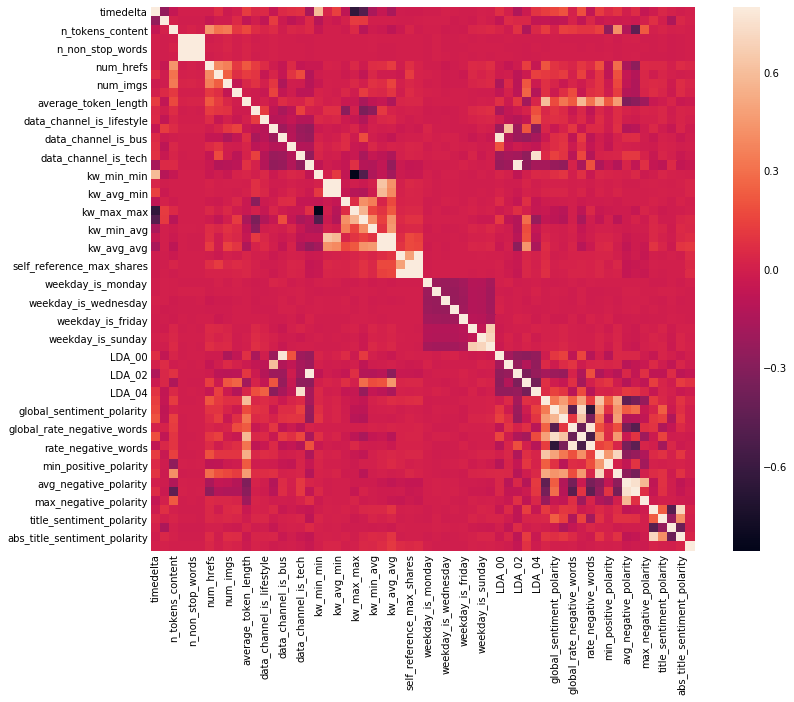

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(), vmax=.8, square=True)

In [8]:
# checking distribution of the dataset
dataset.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.00000,28786.000000,28786.000000,28786.000000
mean,353.520635,10.403460,546.455082,0.555111,1.006600,0.695780,10.873063,3.301674,4.548496,1.259432,4.550483,7.224449,0.053186,0.177691,0.157229,0.058674,0.185681,0.213541,25.917529,1170.187296,313.969191,13741.614431,752845.153894,259488.803305,1119.117710,5661.950910,3136.457660,3959.137988,10180.309566,6328.304836,0.166782,0.186653,0.189224,0.183631,0.144098,0.061905,0.067707,0.129612,0.184370,0.141474,0.216478,0.223049,0.234595,0.443485,0.118936,0.039636,0.016630,0.682098,0.288165,0.353350,0.095110,0.756500,-0.260026,-0.522700,-0.107939,0.282659,0.07220,0.341162,0.156628,3428.658549
std,214.420324,2.121334,470.409467,4.130828,6.138155,3.830214,11.155409,3.868232,8.342588,4.183587,0.842057,1.909620,0.224407,0.382259,0.364023,0.235018,0.388855,0.409814,69.422533,4110.419484,638.580354,58488.942267,213664.134603,135157.683564,1137.505117,6167.654463,1318.413527,19217.142024,39839.079255,23775.239191,0.372788,0.389640,0.391693,0.387190,0.351195,0.240987,0.251246,0.335881,0.263121,0.219639,0.282305,0.294676,0.289643,0.116509,0.096983,0.017406,0.010841,0.190535,0.156808,0.104192,0.070577,0.247865,0.127850,0.290469,0.095253,0.323911,0.26614,0.189085,0.226958,12693.940388
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.00000,0.000000,0.000000,1.000000
25%,163.000000,9.000000,245.000000,0.470735,1.000000,0.625926,4.000000,1.000000,1.000000,0.000000,4.480429,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,446.250000,141.800000,0.000000,843300.000000,172800.000000,0.000000,3560.441280,2383.855650,637.000000,1100.000000,980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025048,0.025014,0.028571,0.028571,0.02857

    seems some of the numeric features are skewed
* first checking shares(target) feature

In [9]:
dataset.shares.describe()

count     28786.000000
mean       3428.658549
std       12693.940388
min           1.000000
25%         940.250000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [10]:
dataset_corr = dataset.corr()['shares']
idx_cor = dataset_corr[dataset_corr > 0].sort_values(ascending=False).index.tolist()
print("How many features have positive correlation with shares(including itself)? %d" % len(idx_cor))

How many features have positive correlation with shares(including itself)? 40


In [11]:
dataset_corr[idx_cor]

shares                          1.000000
kw_avg_avg                      0.109149
LDA_03                          0.081713
kw_max_avg                      0.065700
self_reference_min_shares       0.059641
self_reference_avg_sharess      0.058300
self_reference_max_shares       0.046737
kw_avg_max                      0.045598
num_hrefs                       0.038286
kw_min_avg                      0.038205
kw_avg_min                      0.035677
num_imgs                        0.035277
kw_max_min                      0.033386
global_subjectivity             0.026209
abs_title_sentiment_polarity    0.024263
num_videos                      0.022181
title_subjectivity              0.019393
num_keywords                    0.018376
is_weekend                      0.016676
weekday_is_saturday             0.016211
n_tokens_title                  0.013472
title_sentiment_polarity        0.009718
weekday_is_monday               0.009467
timedelta                       0.008875
avg_positive_pol

In [12]:
dataset_corr.index

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
  

In [13]:
df = dataset[dataset_corr.index].copy(deep=True)

In [14]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,0,1,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1,0,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,7,0,0,0,0,1,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1,0,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
4,731,10,370,0.559889,1.0,0.698198,2,2,0,0,4.359459,9,0,0,0,0,1,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,8500.0,8500.0,8500.000000,1,0,0,0,0,0,0,0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855


    plotting pairplot: which will give complete distribution of dataset

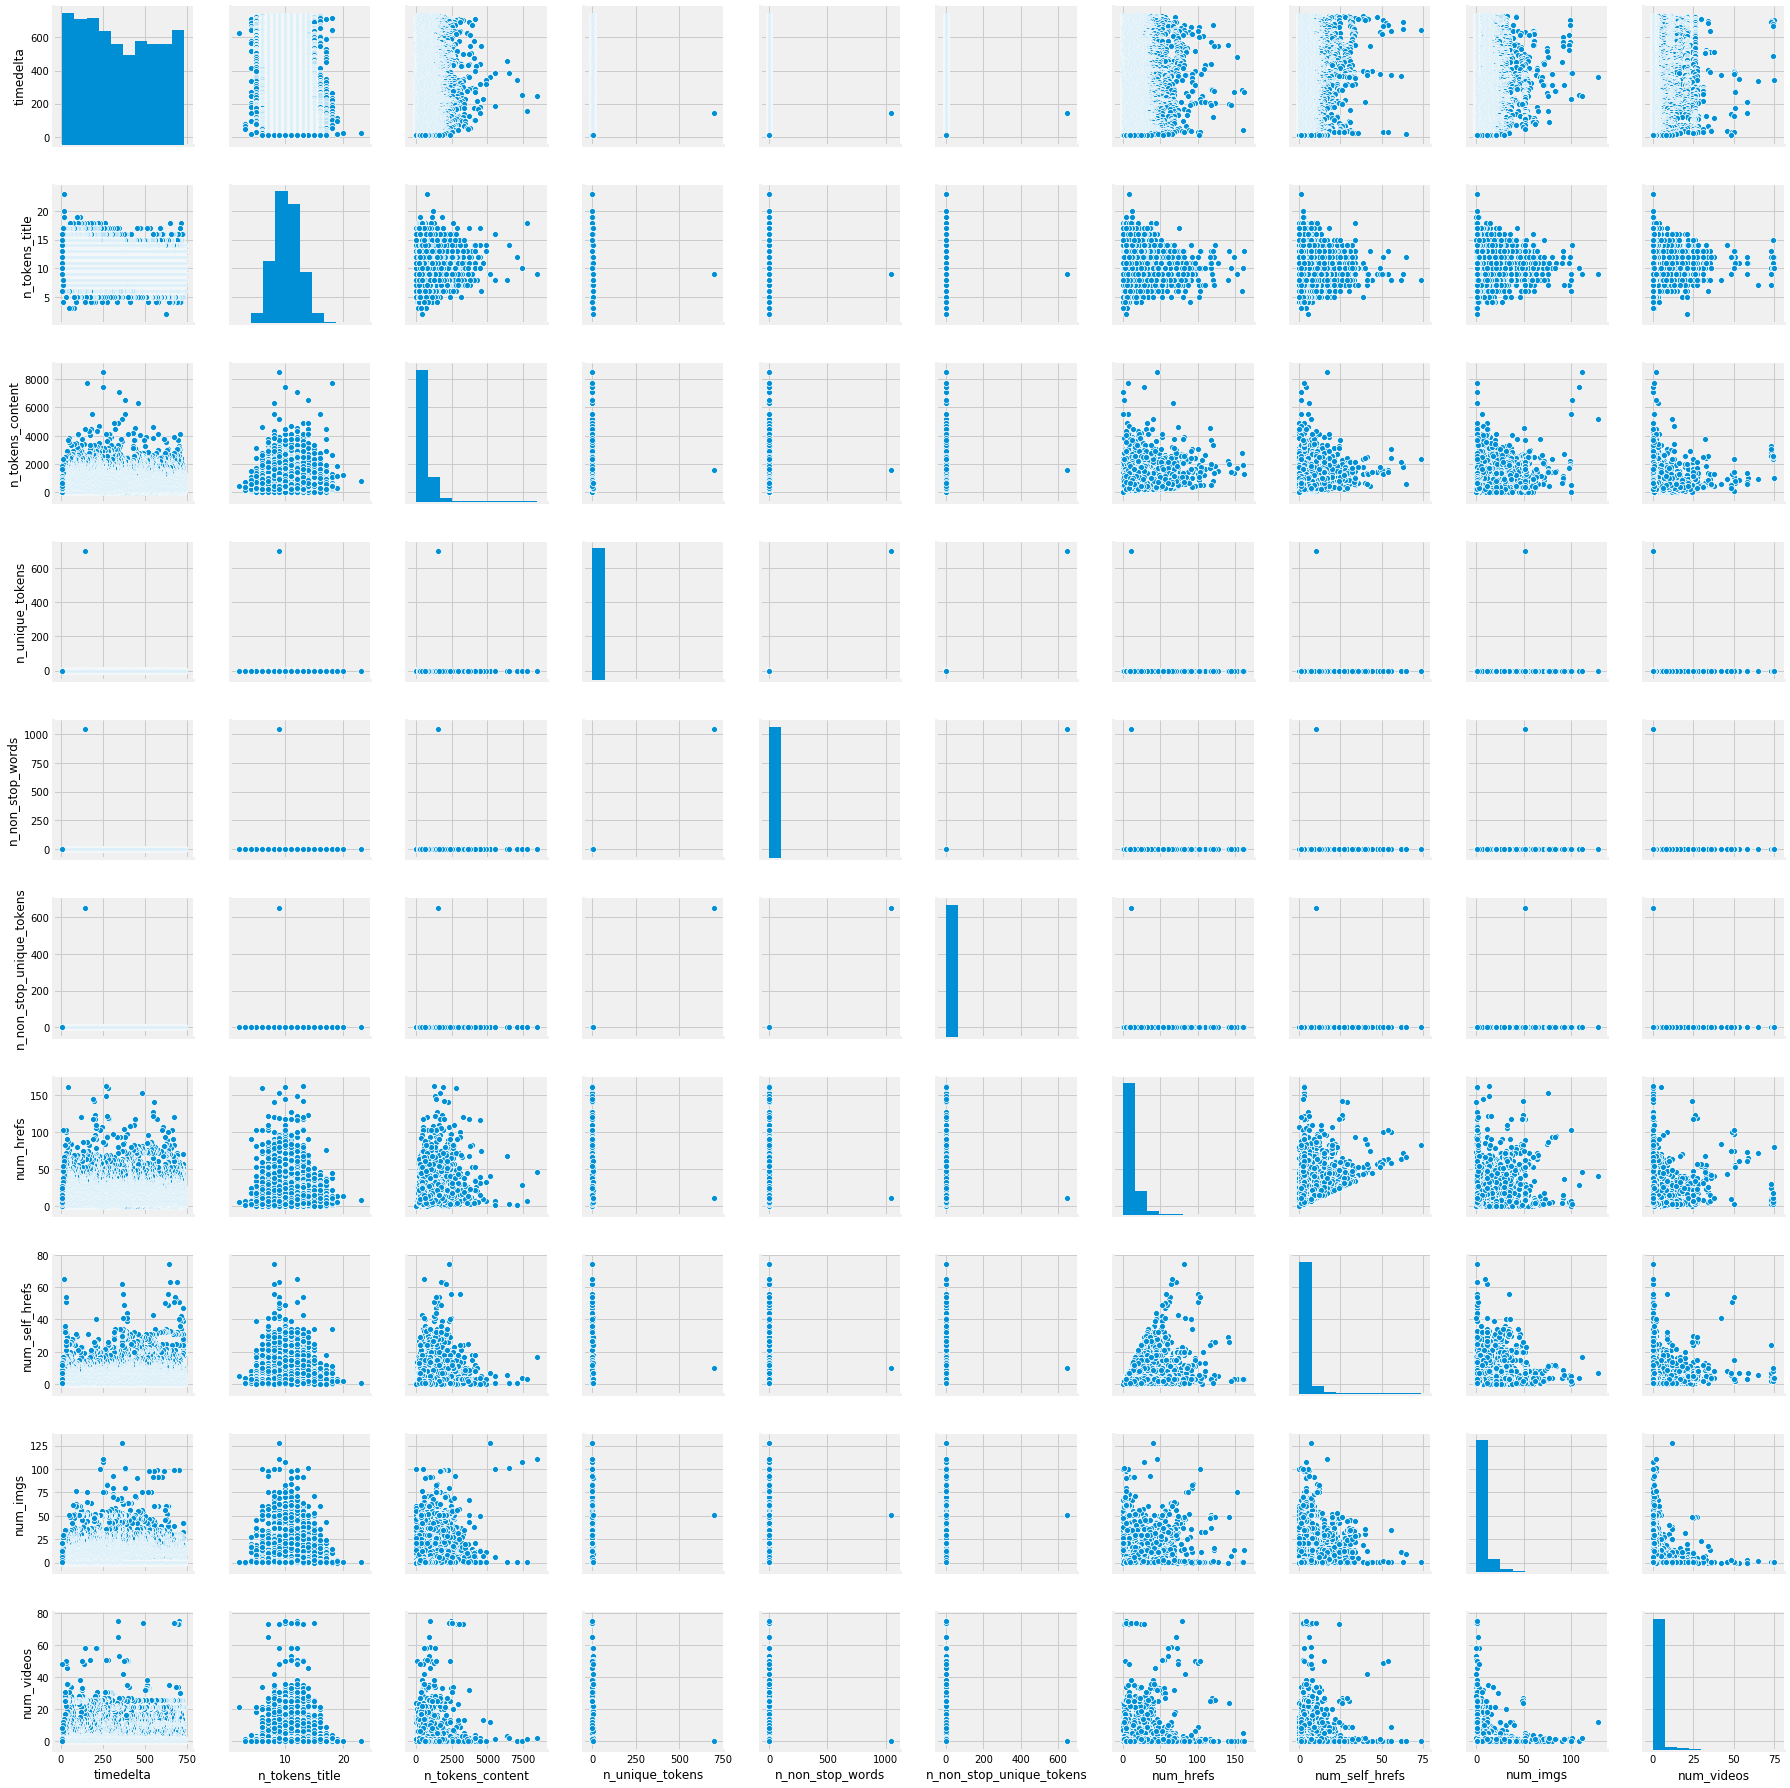

In [15]:
sns.pairplot(df[df.columns[:10]])

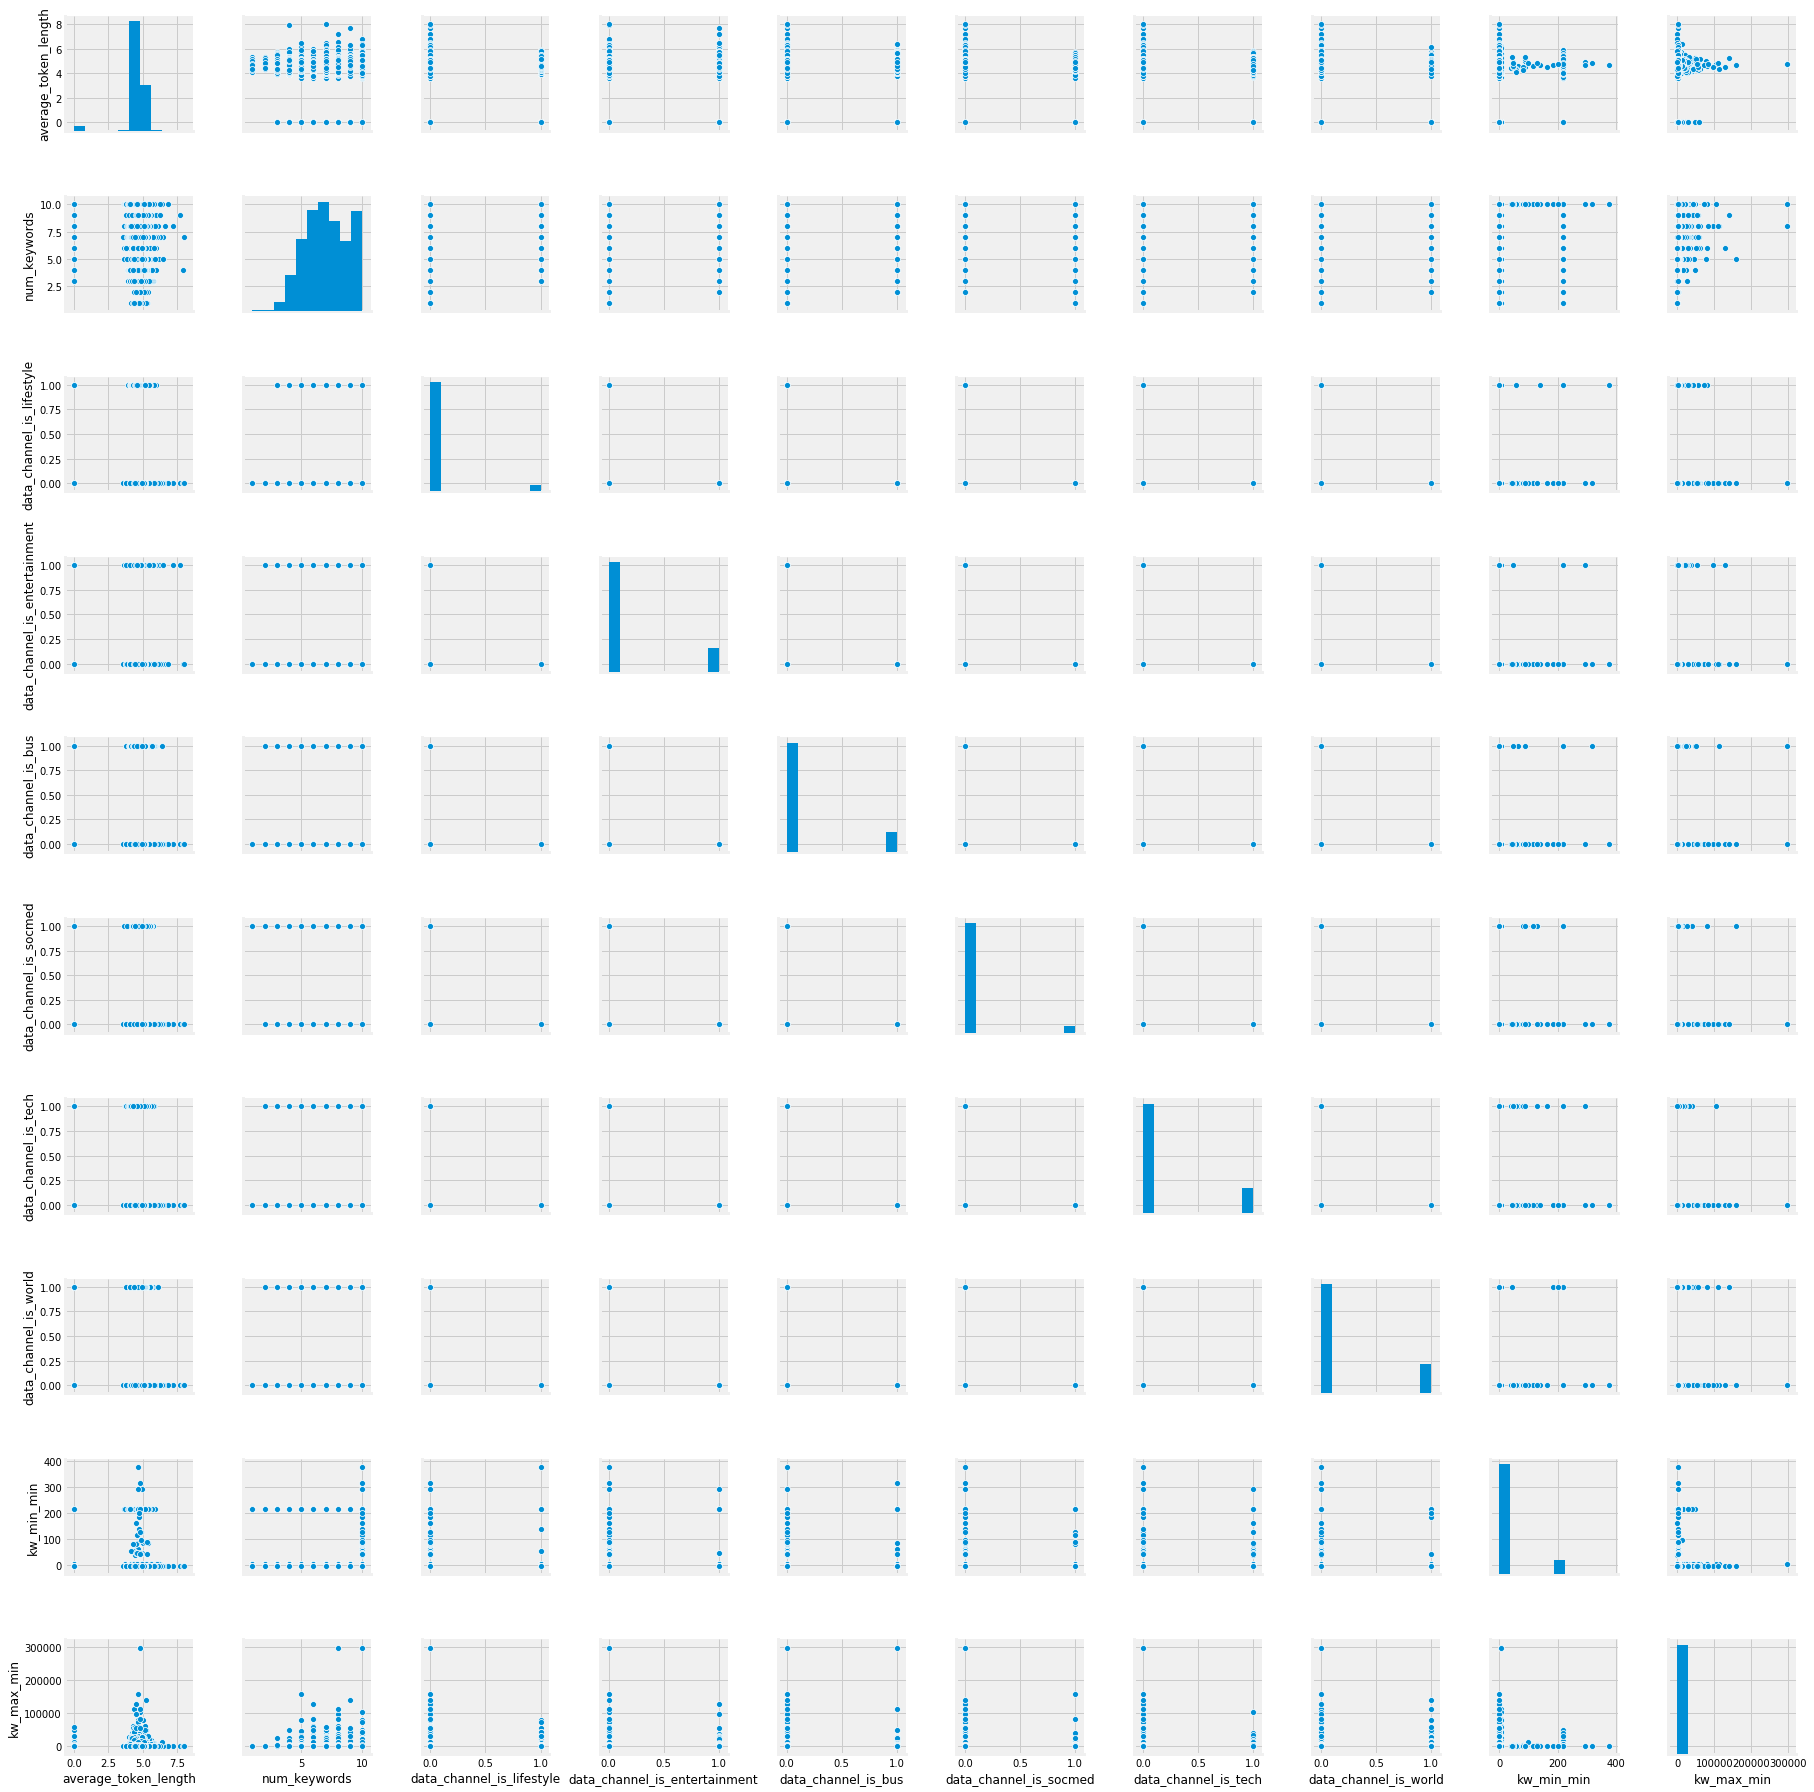

In [16]:
sns.pairplot(df[df.columns[10:20]])

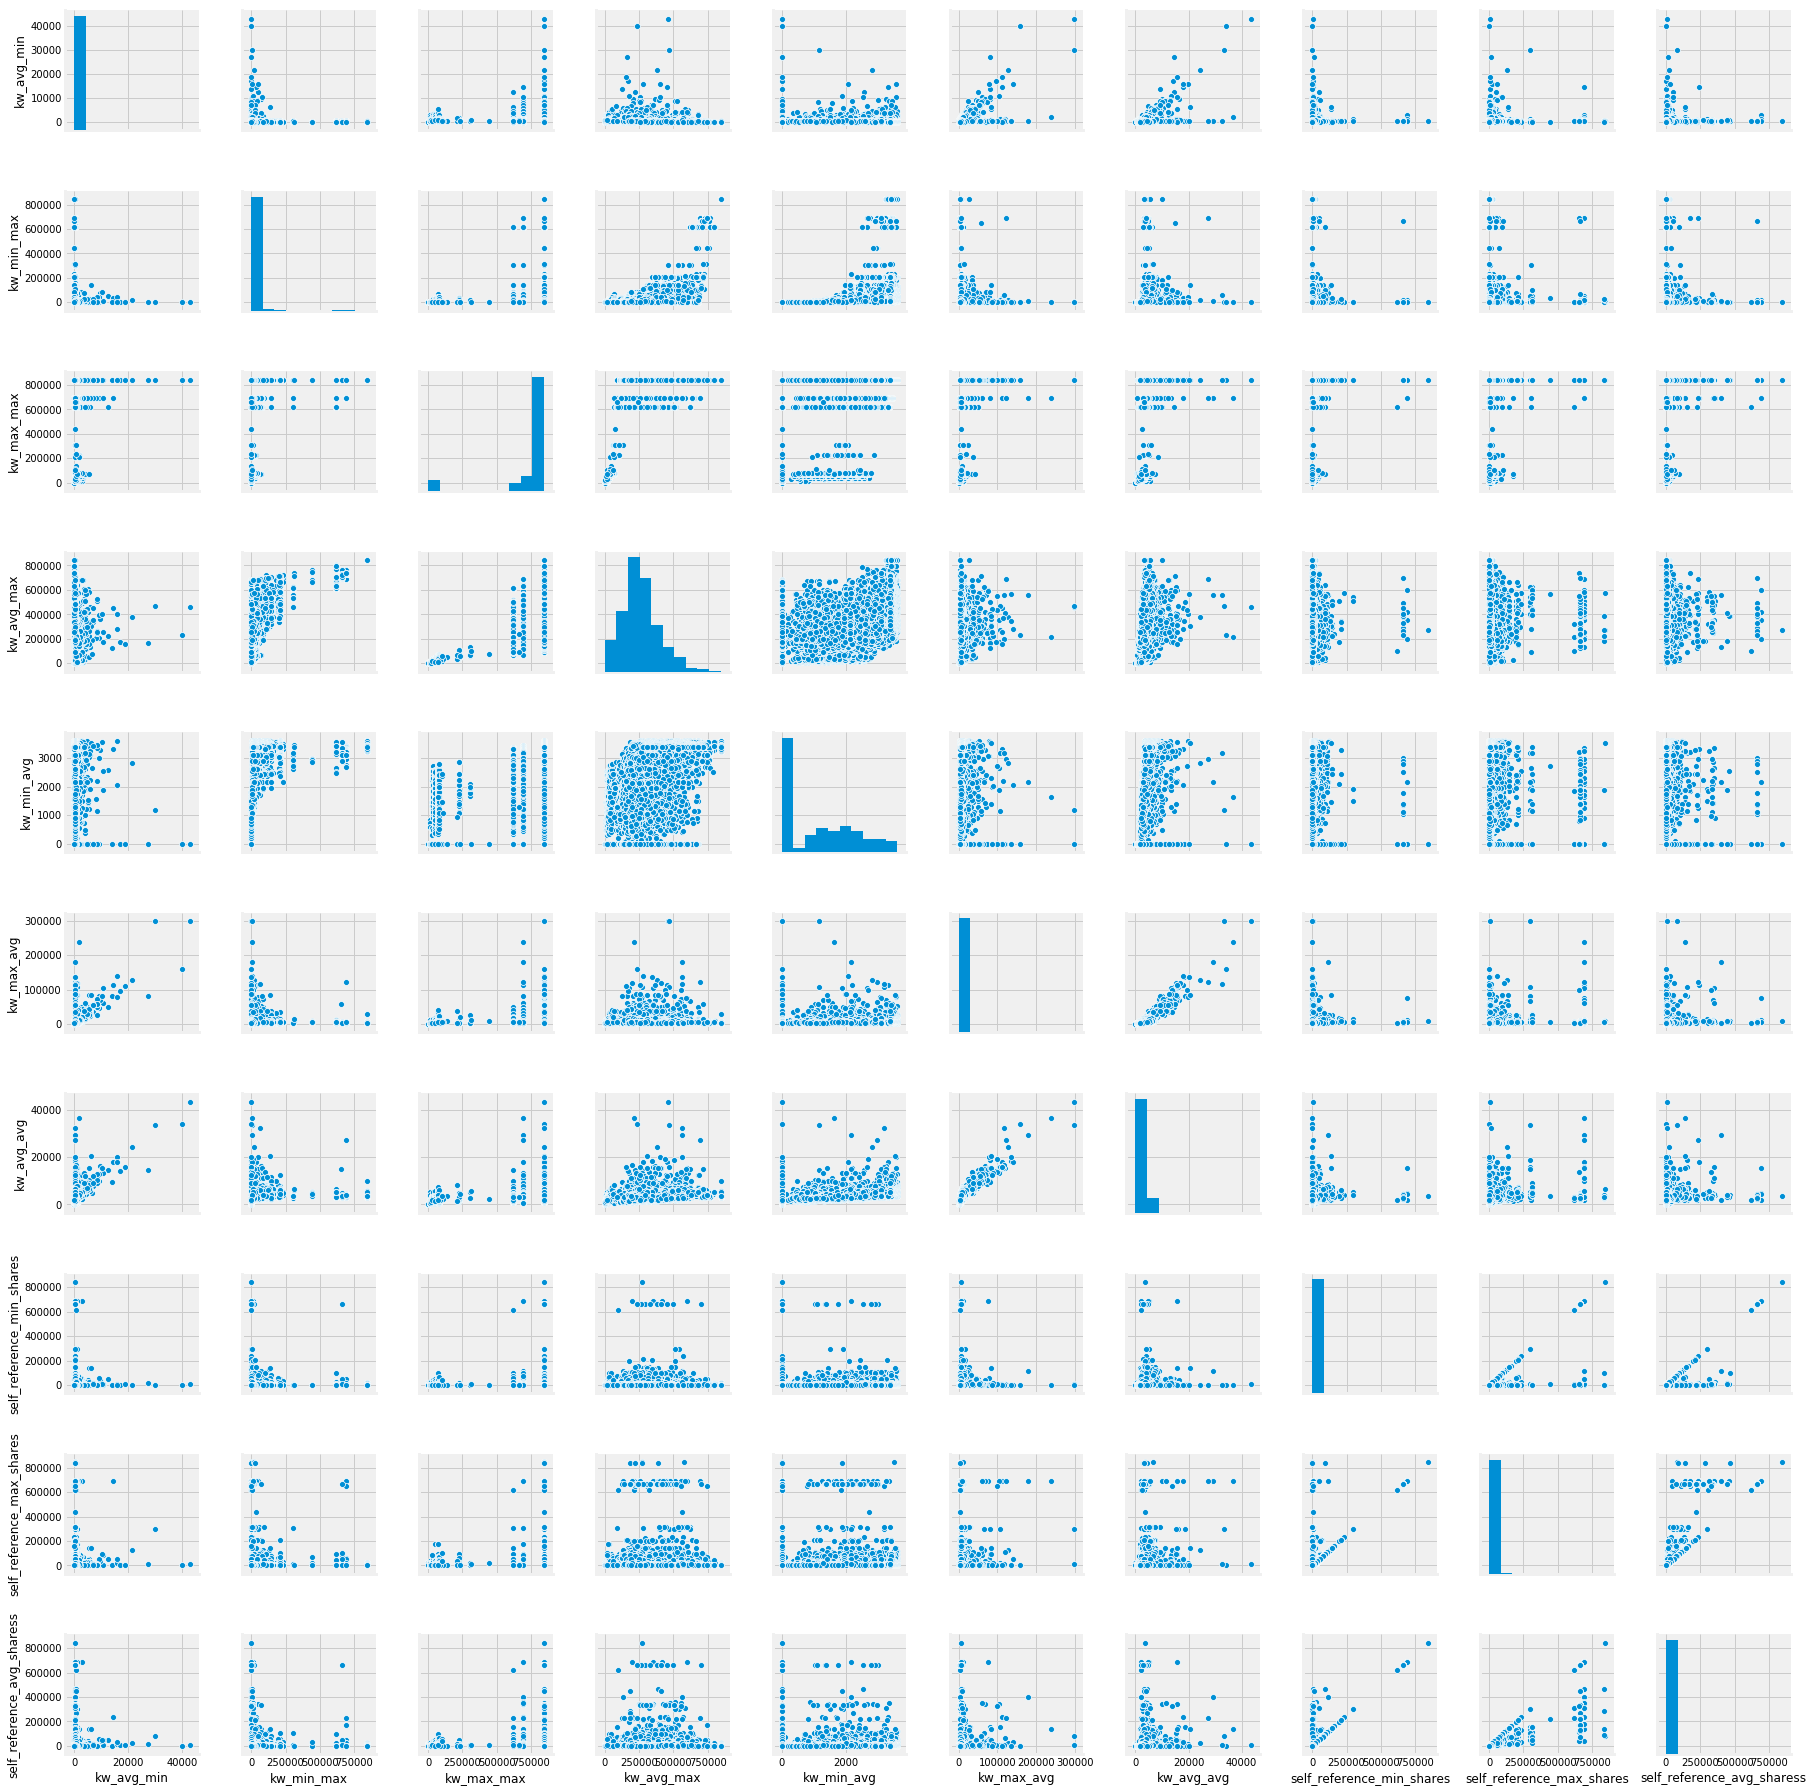

In [17]:
sns.pairplot(df[df.columns[20:30]])

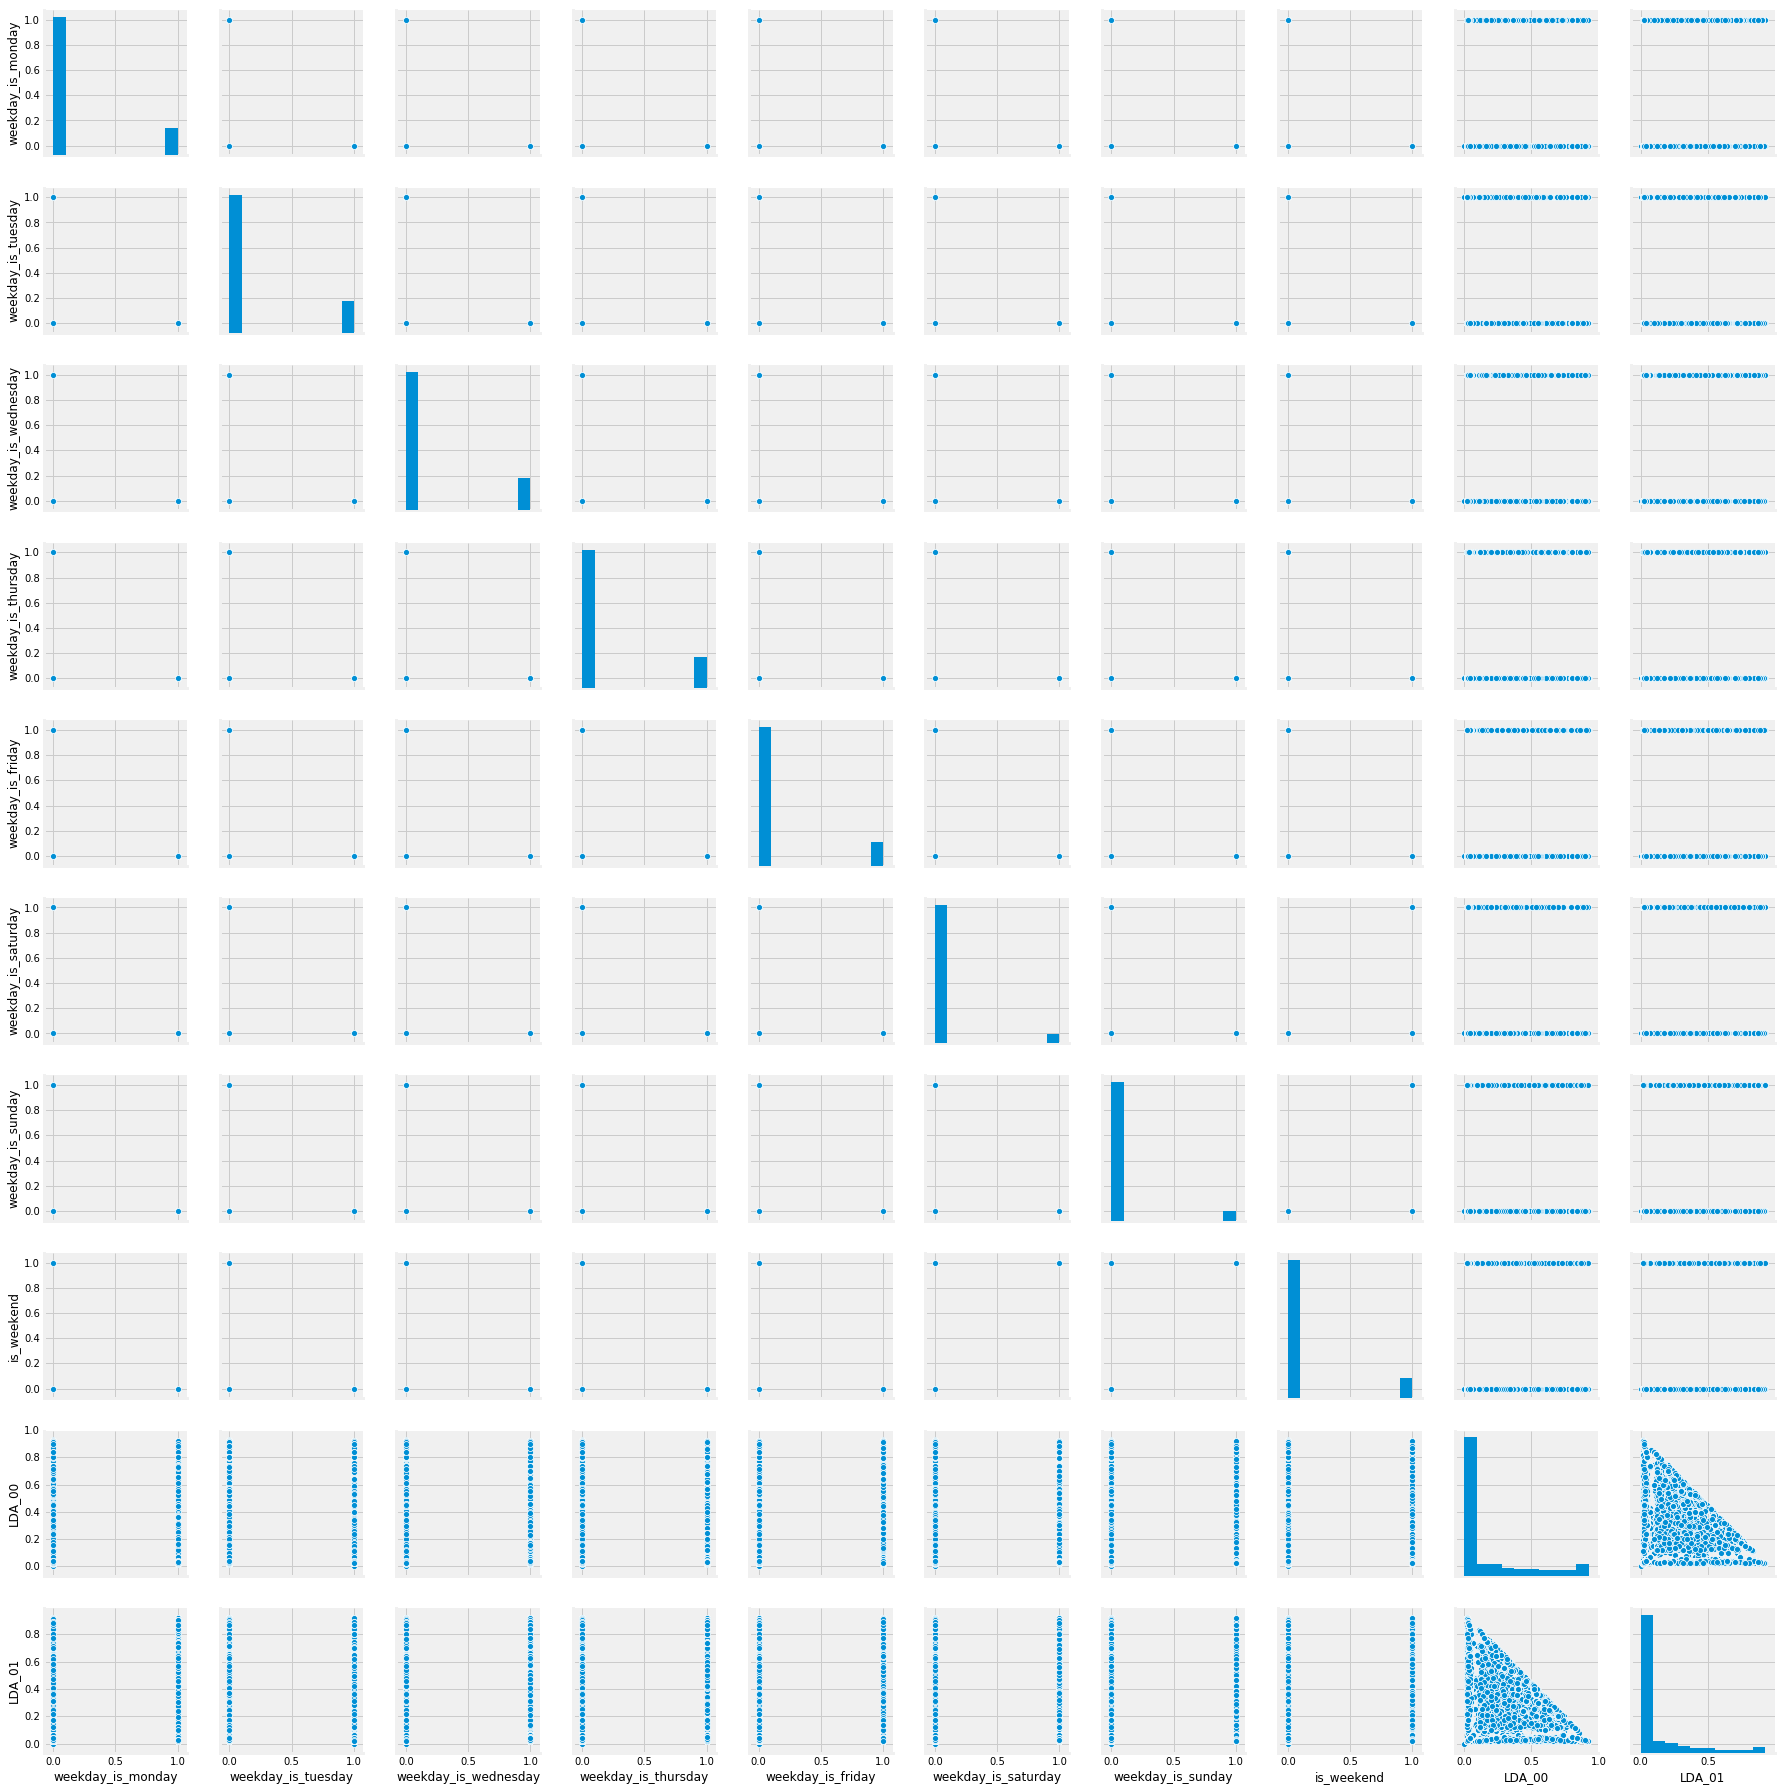

In [18]:
sns.pairplot(df[df.columns[30:40]])

##### there're a few outliers: checking each numeric features with target in scatter plot if there are any outliers will remove it

In [19]:
df.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
  

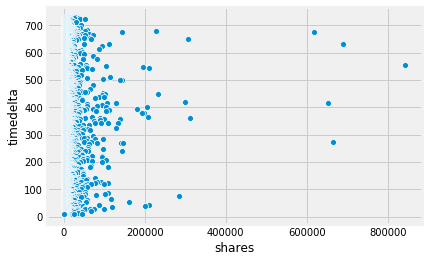

In [20]:
sns.scatterplot(x = df['shares'], y = df['timedelta'])

In [21]:
outliers_idx = df[df['shares'] > 400000.0]['shares'].index
outliers_idx

Int64Index([2258, 3864, 6799, 11763, 16816], dtype='int64')

In [22]:
df = df.drop(outliers_idx)

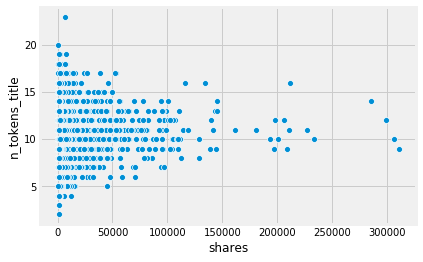

In [23]:
sns.scatterplot(x = df['shares'], y = df['n_tokens_title'])

In [24]:
outliers_idx = df[df['shares'] > 250000.0]['shares'].index
df = df.drop(outliers_idx)

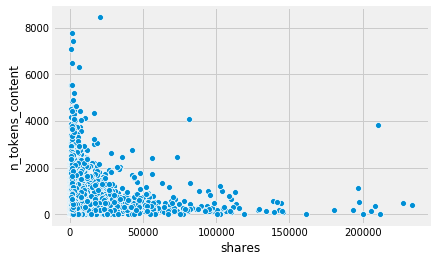

In [25]:
sns.scatterplot(x = df['shares'], y = df['n_tokens_content'])

In [26]:
outliers_idx = df[(df['shares'] > 200000.0) & (df['n_tokens_content'] > 3800.0)]['shares'].index
df = df.drop(outliers_idx)

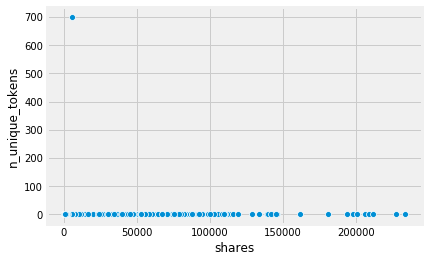

In [27]:
sns.scatterplot(x = df['shares'], y = df['n_unique_tokens'])

In [28]:
outliers_idx = df[df['n_unique_tokens'] > 700.0]['n_unique_tokens'].index
df = df.drop(outliers_idx)

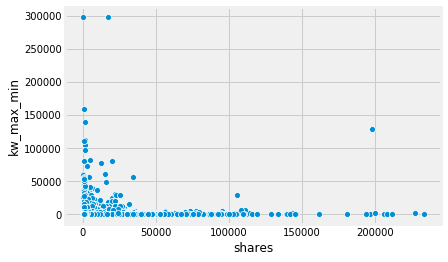

In [29]:
sns.scatterplot(x = df['shares'], y = df['kw_max_min'])

In [30]:
outliers_idx = df[(df['shares'] > 150000.0) & (df['kw_max_min'] > 100000.0)]['shares'].index
df = df.drop(outliers_idx)

In [31]:
outliers_idx = df[df['kw_max_min'] > 200000.0]['kw_max_min'].index
outliers_idx

Int64Index([11773, 11784], dtype='int64')

In [32]:
df = df.drop(outliers_idx)

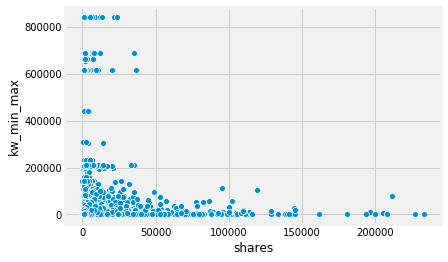

In [33]:
sns.scatterplot(x = df['shares'], y = df['kw_min_max'])

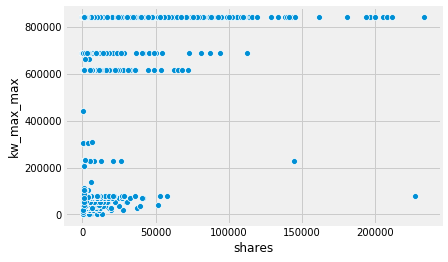

In [34]:
sns.scatterplot(x = df['shares'], y = df['kw_max_max'])

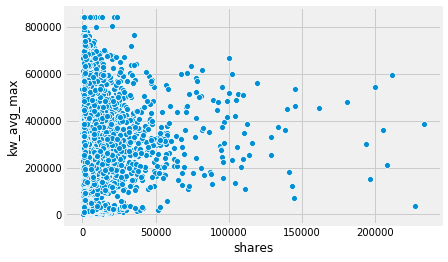

In [35]:
sns.scatterplot(x = df['shares'], y = df['kw_avg_max'])

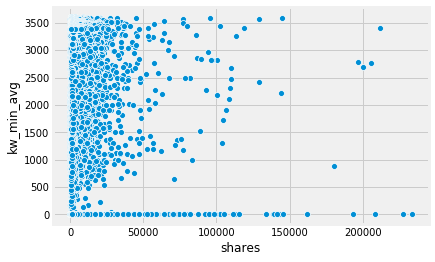

In [36]:
sns.scatterplot(x = df['shares'], y = df['kw_min_avg'])

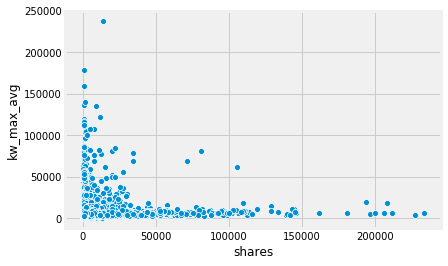

In [37]:
sns.scatterplot(x = df['shares'], y = df['kw_max_avg'])

In [38]:
outliers_idx = df[df['kw_max_avg'] > 200000.0]['kw_max_avg'].index
df = df.drop(outliers_idx)

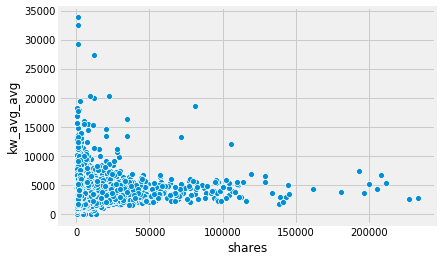

In [39]:
sns.scatterplot(x = df['shares'], y = df['kw_avg_avg'])

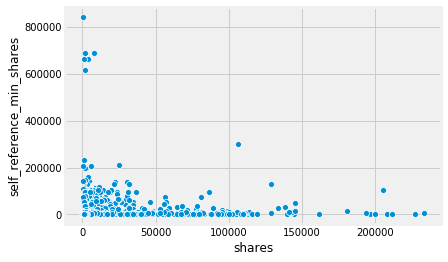

In [40]:
sns.scatterplot(x = df['shares'], y = df['self_reference_min_shares'])

In [41]:
outliers_idx = df[df['self_reference_min_shares'] > 200000.0]['self_reference_min_shares'].index
df = df.drop(outliers_idx)

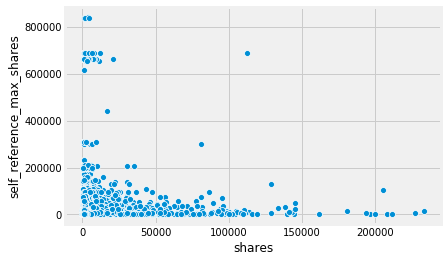

In [42]:
sns.scatterplot(x = df['shares'], y = df['self_reference_max_shares'])

In [43]:
outliers_idx = df[(df['shares'] > 100000.0) & (df['self_reference_max_shares'] > 600000.0)]['shares'].index
df = df.drop(outliers_idx)

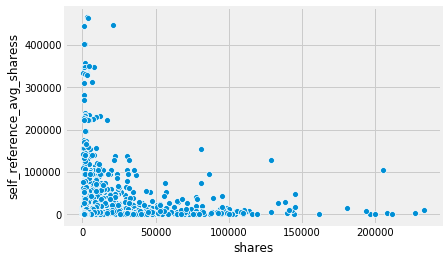

In [44]:
sns.scatterplot(x = df['shares'], y = df['self_reference_avg_sharess'])

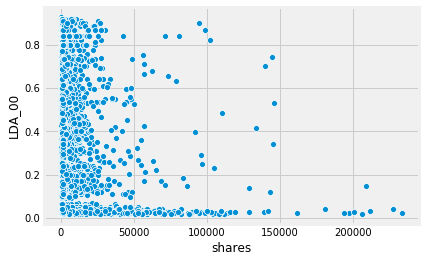

In [45]:
sns.scatterplot(x = df['shares'], y = df['LDA_00'])

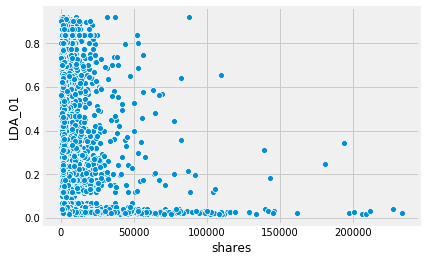

In [46]:
sns.scatterplot(x = df['shares'], y = df['LDA_01'])

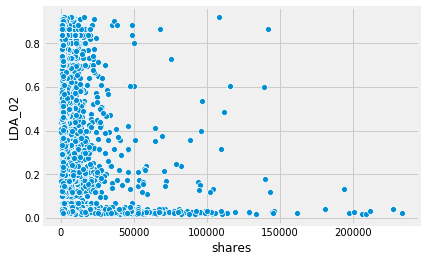

In [47]:
sns.scatterplot(x = df['shares'], y = df['LDA_02'])

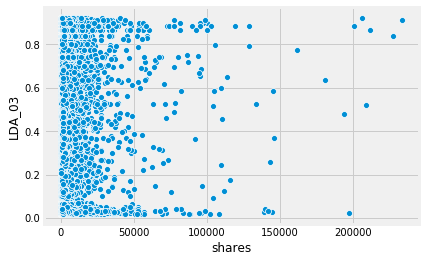

In [48]:
sns.scatterplot(x = df['shares'], y = df['LDA_03'])

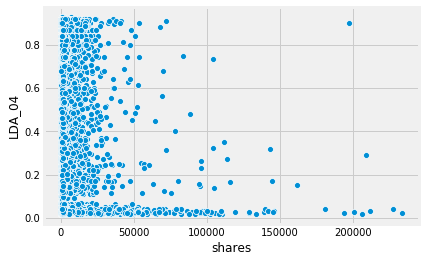

In [49]:
sns.scatterplot(x = df['shares'], y = df['LDA_04'])

In [50]:
outliers_idx = df[(df['shares'] > 150000.0) & (df['LDA_04'] > 0.8)]['shares'].index
df = df.drop(outliers_idx)

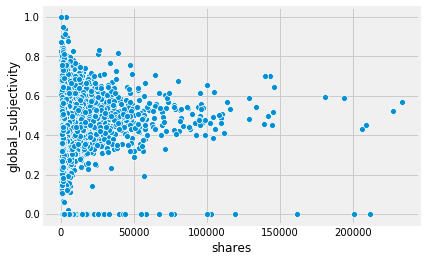

In [51]:
sns.scatterplot(x = df['shares'], y = df['global_subjectivity'])

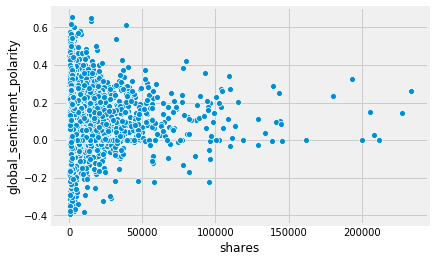

In [52]:
sns.scatterplot(x = df['shares'], y = df['global_sentiment_polarity'])

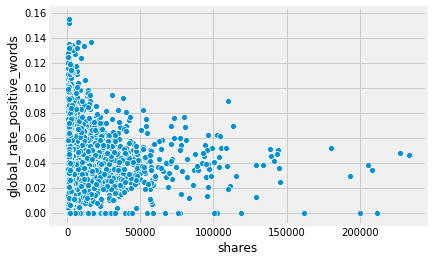

In [53]:
sns.scatterplot(x = df['shares'], y = df['global_rate_positive_words'])

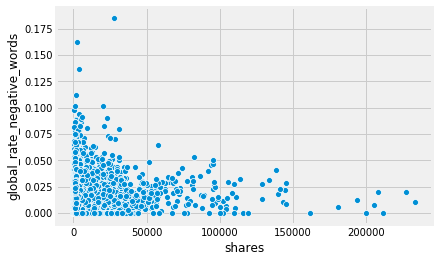

In [54]:
sns.scatterplot(x = df['shares'], y = df['global_rate_negative_words'])

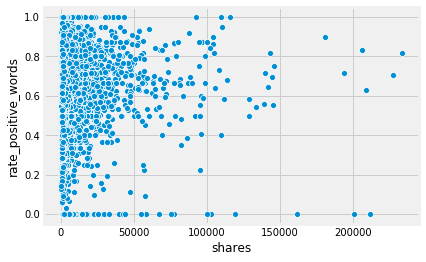

In [55]:
sns.scatterplot(x = df['shares'], y = df['rate_positive_words'])

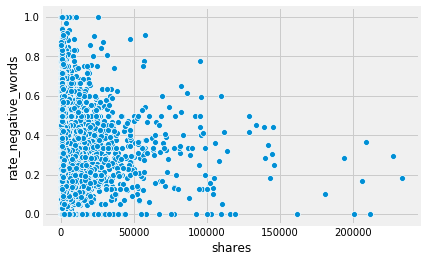

In [56]:
sns.scatterplot(x = df['shares'], y = df['rate_negative_words'])

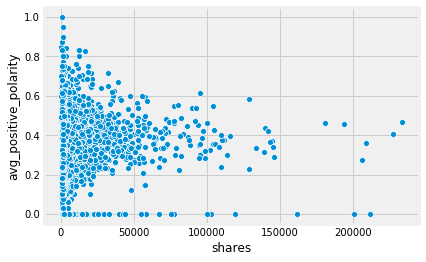

In [57]:
sns.scatterplot(x = df['shares'], y = df['avg_positive_polarity'])

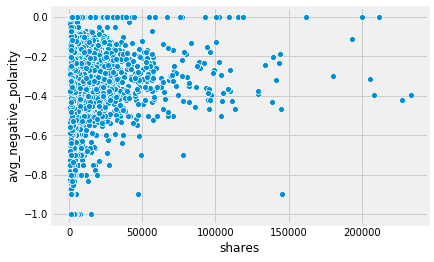

In [58]:
sns.scatterplot(x = df['shares'], y = df['avg_negative_polarity'])

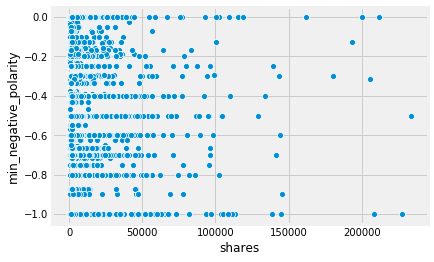

In [59]:
sns.scatterplot(x = df['shares'], y = df['min_negative_polarity'])

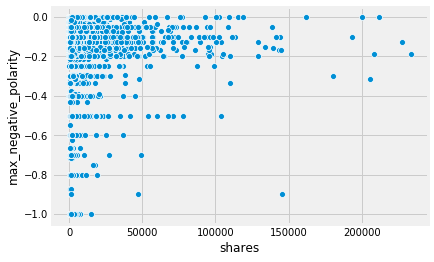

In [60]:
sns.scatterplot(x = df['shares'], y = df['max_negative_polarity'])

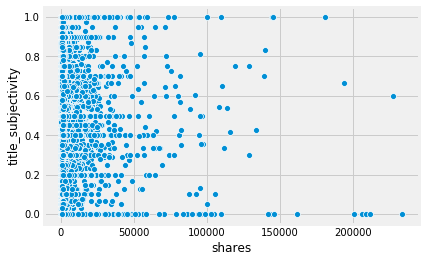

In [61]:
sns.scatterplot(x = df['shares'], y = df['title_subjectivity'])

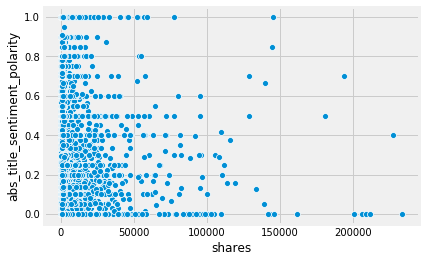

In [62]:
sns.scatterplot(x = df['shares'], y = df['abs_title_sentiment_polarity'])

In [63]:
df['shares'].describe()

count     28747.000000
mean       3238.510036
std        7760.637459
min           1.000000
25%         940.000000
50%        1400.000000
75%        2800.000000
max      233400.000000
Name: shares, dtype: float64

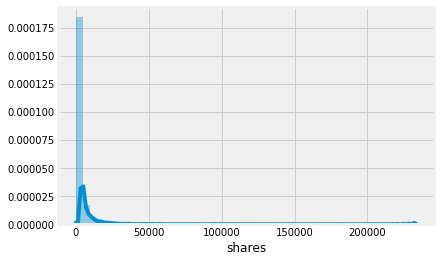

In [64]:
sns.distplot(df['shares'])

### Transforming 'shares' by taking log

In [65]:
df['shares'] = np.log(df['shares'])

In [66]:
X = df.drop('shares', axis = 1)

In [67]:
y = df['shares']

### Backward Elimination
* As the name suggest, we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

* The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

In [68]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_new = X[cols]
    X_new = sm.add_constant(X_new)
    model = sm.OLS(y,X_new).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols

/home/winjit/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [69]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                   OLS                 Adj. R-squared:        0.133     
Dependent Variable:      shares              AIC:                   73005.6343
Date:                    2019-09-22 23:30    BIC:                   73319.7533
No. Observations:        28747               Log-Likelihood:        -36465.   
Df Model:                37                  F-statistic:           119.8     
Df Residuals:            28709               Prob (F-statistic):    0.00      
R-squared:               0.134               Scale:                 0.74111   
------------------------------------------------------------------------------
                               Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------------
const                          4.7758   0.0431 110.9331 0.0000  4.6914  4.8601
n_tokens_title                 0.0089   0.0025   3.5556 0.0004  0.0040  0.0138
n_tokens_content               0.0000   0.0000   3.3996 0.0007  0.0000  0.0001
num_hrefs                      0.0047   0.0006   8.0127 0.0000  0.0035  0.0058
num_self_hrefs                -0.0062   0.0015  -4.0343 0.0001 -0.0092 -0.0032
num_imgs                       0.0032   0.0007   4.4908 0.0000  0.0018  0.0046
average_token_length          -0.0830   0.0101  -8.2553 0.0000 -0.1027 -0.0633
num_keywords                   0.0124   0.0032   3.8699 0.0001  0.0061  0.0187
data_channel_is_lifestyle     -0.0706   0.0293  -2.4125 0.0159 -0.1279 -0.0132
data_channel_is_entertainment -0.1373   0.0198  -6.9329 0.0000 -0.1761 -0.0985
data_channel_is_bus           -0.1448   0.0279  -5.1916 0.0000 -0.1994 -0.0901
data_channel_is_socmed         0.1834   0.0269   6.8167 0.0000  0.1307  0.2362
data_channel_is_tech           0.1470   0.0248   5.9165 0.0000  0.0983  0.1957
kw_min_min                     0.0009   0.0001   9.8415 0.0000  0.0007  0.0011
kw_avg_min                    -0.0000   0.0000  -2.6252 0.0087 -0.0001 -0.0000
kw_min_max                    -0.0000   0.0000  -3.1682 0.0015 -0.0000 -0.0000
kw_avg_max                    -0.0000   0.0000  -2.7271 0.0064 -0.0000 -0.0000
kw_min_avg                    -0.0000   0.0000  -7.4315 0.0000 -0.0001 -0.0000
kw_max_avg                    -0.0000   0.0000 -17.7511 0.0000 -0.0000 -0.0000
kw_avg_avg                     0.0003   0.0000  25.8641 0.0000  0.0003  0.0003
self_reference_min_shares      0.0000   0.0000  10.9077 0.0000  0.0000  0.0000
self_reference_avg_sharess     0.0000   0.0000   3.1001 0.0019  0.0000  0.0000
weekday_is_monday              0.8387   0.0135  62.0270 0.0000  0.8122  0.8652
weekday_is_tuesday             0.7922   0.0132  60.1175 0.0000  0.7664  0.8180
weekday_is_wednesday           0.7766   0.0131  59.2336 0.0000  0.7509  0.8023
weekday_is_thursday            0.7947   0.0132  60.3624 0.0000  0.7689  0.8205
weekday_is_friday              0.8547   0.0142  60.2831 0.0000  0.8269  0.8825
weekday_is_saturday            0.3525   0.0152  23.1546 0.0000  0.3226  0.3823
weekday_is_sunday              0.3664   0.0149  24.5384 0.0000  0.3371  0.3956
is_weekend                     0.7188   0.0104  69.1581 0.0000  0.6984  0.7392
LDA_00                         1.2440   0.0302  41.2050 0.0000  1.1848  1.3032
LDA_01                         0.8467   0.0267  31.7091 0.0000  0.7943  0.8990
LDA_02                         0.7783   0.0217  35.8292 0.0000  0.7358  0.8209
LDA_03                         0.9113   0.0233  39.0777 0.0000  0.8656  0.9570
LDA_04                         0.9955   0.0270  36.8686 0.0000  0.9426  1.0484
global_subjectivity            0.4339   0.0617   7.0380 0.0000  0.3131  0.5548
global_sentiment_polarity     -0.2934   0.0893  -3.2842 0.0010 -0.4685 -0.1183
rate_positive_words            0.1222   0.0543   2.2514 0.0244  0.0158  0.2287
title_subjectivity       

In [70]:
# features which are significant for model building
selected_features

['n_tokens_title',
 'n_tokens_content',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'kw_min_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'rate_positive_words',
 'title_subjectivity',
 'title_sentiment_polarity',
 'abs_title_subjectivity']

In [71]:
final_df = X[selected_features]

In [72]:
final_df.head()

,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,kw_min_min,kw_avg_min,kw_min_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,rate_positive_words,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity
0,12,219,4,2,1,4.680365,5,0,1,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,496.0,496.000000,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.769231,0.500000,-0.187500,0.000000
1,9,255,3,1,1,4.913725,4,0,0,1,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.733333,0.000000,0.000000,0.500000
2,9,211,3,1,1,4.393365,6,0,0,1,0,0,0,0.0,0,0.0,0.0,0.0,0.0,918.0,918.000000,1,0,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.857143,0.000000,0.000000,0.500000
3,13,1072,19,19,20,4.682836,7,0,0,0,0,1,0,0.0,0,0.0,0.0,0.0,0.0,545.0,3151.157895,1,0,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.860215,0.454545,0.136364,0.045455
4,10,370,2,2,0,4.359459,9,0,0,0,0,1,0,0.0,0,0.0,0.0,0.0,0.0,8500.0,8500.000000,1,0,0,0,0,0,0,0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.523810,0.642857,0.214286,0.142857


In [73]:
Xtrain, Xtest, ytrain, ytest = train_test_split(final_df, y, test_size = 0.20)

In [74]:
Xtrain.shape

(22997, 40)

In [75]:
Xtest.shape

(5750, 40)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr_model = LinearRegression()

In [78]:
lr_model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
predictions = lr_model.predict(Xtest)

In [80]:
predictions

array([6.91645117, 7.9899889 , 7.33909194, ..., 7.1822876 , 7.58667148,
       7.31069805])

In [81]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [82]:
y_pred = np.exp(predictions)

In [83]:
y_true = np.exp(ytest)

In [84]:
mape = mean_absolute_percentage_error(y_true,y_pred)

In [85]:
mape

74.63853439973322